David López Valdivia y Jimena de Prado González

# SEMANA 1

- Empezamos importando las librerías que vamos a usar y el dataset

In [40]:
import numpy as np, pandas as pd, seaborn as sns
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')

## 1.1 Limpieza del dataset

- Vamos a empezar indicando que variables tienen valores nulos y cuáles tienen outliers para facilitar el preprocesado

#### <span style='color:steelblue'> Valores nulos: </span>

In [3]:
data.isnull().sum()

Customer ID                                  0
network_age                                  0
Customer tenure in month                     0
Total Spend in Months 1 and 2 of 2017        0
Total SMS Spend                              0
Total Data Spend                             0
Total Data Consumption                       0
Total Unique Calls                           0
Total Onnet spend                            0
Total Offnet spend                           0
Total Call centre complaint calls            0
Network type subscription in Month 1         0
Network type subscription in Month 2        22
Most Loved Competitor network in Month 1     1
Most Loved Competitor network in Month 2     1
Churn Status                                 0
dtype: int64

#### <span style='color:steelblue'> Outliers: </span>

In [9]:
#Función para detectar outliers:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
#Tomamos solo las variables numéricas
data_numericos = data.loc[:, data.dtypes != object]
is_outlier_IQR(data_numericos).sum()

network_age                                5
Customer tenure in month                   5
Total Spend in Months 1 and 2 of 2017     62
Total SMS Spend                          111
Total Data Spend                         114
Total Data Consumption                   157
Total Unique Calls                       101
Total Onnet spend                        120
Total Offnet spend                       145
Total Call centre complaint calls        124
Churn Status                               0
dtype: int64

### a) Customer ID

- Esta variable representa los ID de todos los clientes, veamos sus valores únicos para comprobarlo:

In [2]:
data['Customer ID'].unique()

array(['ADF0039', 'ADF0040', 'ADF0041', ..., 'ADF1998', 'ADF1999',
       'ADF2000'], dtype=object)

- Como esta variable no es relevante podemos eliminarla

In [3]:
data= data.drop('Customer ID', axis = 1)

### c) Customer tenure in month

In [6]:
data['Customer tenure in month'].value_counts()

Customer tenure in month
3.90      7
3.67      6
4.17      5
4.00      4
3.57      4
         ..
20.87     1
107.10    1
23.97     1
73.83     1
31.23     1
Name: count, Length: 883, dtype: int64

- Por sus valores se puede deducir que se trata de una variable numérica representa los meses que lleva un cliente en la compañía

- Recordemos que esta columna tenía 5 outliers, veamos cuales son sus valores

In [10]:
outliermth = data['Customer tenure in month'][is_outlier_IQR(data['Customer tenure in month'])]
outliermth

8      177.80
172    172.60
208    181.70
353    172.70
484    179.13
Name: Customer tenure in month, dtype: float64

- Consideremos la posibilidad de que pueda tener una distribución de cola pesada

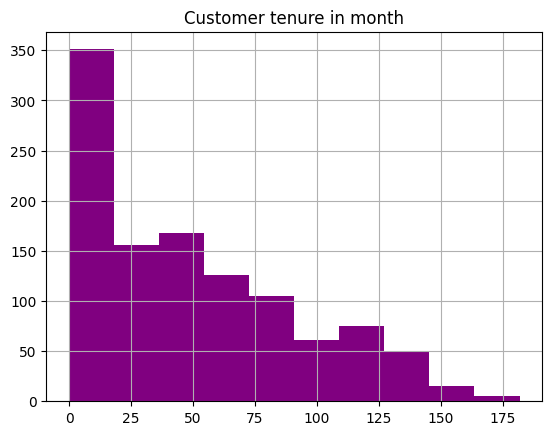

In [5]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Customer tenure in month'],color = "purple") 
  
ax.set_title("Customer tenure in month")
plt.grid()
plt.show()

- Como así es, realicemos un ajuste logarítmico para ver si dejamos de tener outliers

In [25]:
log = np.log10(data['Customer tenure in month']+1)

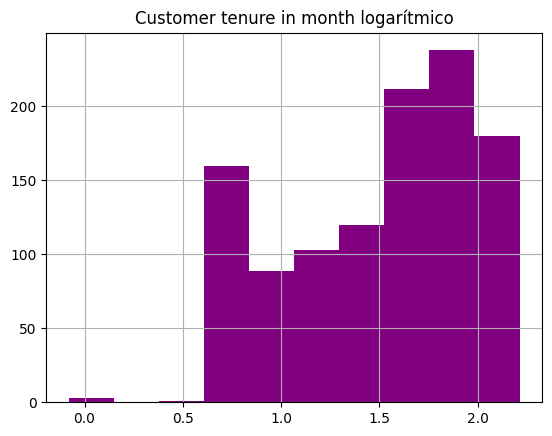

In [26]:
fig, ax = plt.subplots(1, 1) 
ax.hist(log,color = "purple") 
  
ax.set_title("Customer tenure in month logarítmico")
plt.grid()
plt.show()

### e) Total SMS Spend

In [19]:
data['Total SMS Spend'].value_counts()

Total SMS Spend
0.00     161
1.75      41
3.50      20
0.01      19
5.25      18
        ... 
56.72      1
35.32      1
26.18      1
9.49       1
32.40      1
Name: count, Length: 600, dtype: int64

- Por estos valores podemos deducir que se trata del gasto en mensajes SMS de cada cliente 

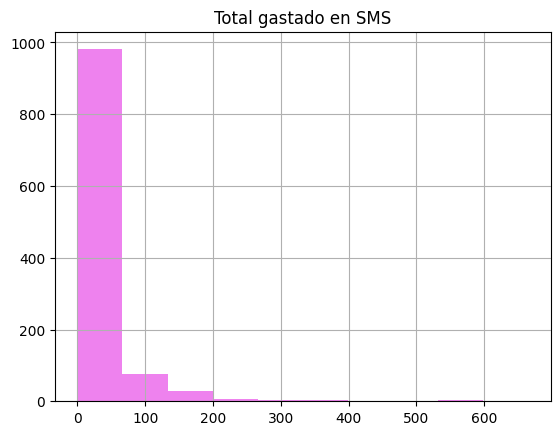

In [22]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Total SMS Spend'],color = "violet") 
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

- Veamos si con una distribución logarítmica podemos tartar el problema de los outliers

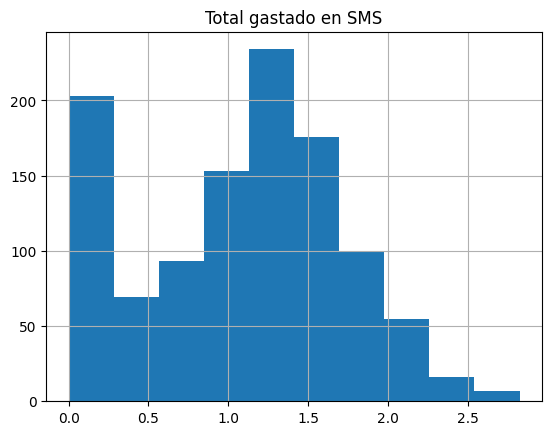

In [27]:
fig, ax = plt.subplots(1, 1) 
ax.hist(np.log10(data['Total SMS Spend']+1) )
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

### g) Total Data Consumption

In [31]:
data['Total Data Consumption'].unique()

array([1.47383000e+01, 8.34497342e+07, 7.11599229e+04, ...,
       1.31274587e+05, 2.16600627e+06, 1.82811500e+02])

** Es numérica la dejamos de momento

### i) Total Onnet spend

In [32]:
data['Total Onnet spend'].unique()

array([  2940,      0,    131,    696,  18635,   5532,    600,   2892,
        15225,   1428,   2155,    120,  10578,  17184,  10305,   1470,
        13980,    885,   7260,   2832,     60,    480,   1024,    906,
          228,     24,    168,    888,  38778,  10255,    486,  24828,
         1254,  31601,   2710,    502,  11478,   1908,     12,  75699,
          564,   3024,  10516,   5080,    275,  24450,   5271,  11378,
          813,  18100,   4744,    992,   1092,   5713,    804,   4338,
          558,   1304,  49351,   5568,  10008,    324,  55390,   5287,
         1506,   2799,   9395,   1829,   5472,  71208,   3387,  12324,
          287,    216,  48720,   2850,    970,  16087,    753,  64872,
         4131,    526,   4584,   4853,   8928,   2421,    738,   1243,
         4569,   5634,    570,    132,   7608,  18603,   9666,   2700,
         2268,   3452,   4434,   8856,  17408,   2634,  10137,   1248,
        18157,    610,  15228,   7852,  37401,   4260,   8608,    240,
      

** Es numérica lo dejas hasta hacer el modelo 

### k) Total Call centre complaint calls

In [33]:
data['Total Call centre complaint calls'].unique()

array([ 4,  2,  1,  3,  5, 13, 12,  6, 14, 16,  7,  8, 11, 21, 10,  9, 18,
       15, 49])

** Es numérica siguiente

### k) Total Call centre complaint calls

# Tratamos los valores nulos antes de seguir con el modelo. Probamos, y luego volvemos por si tenemos que tratar outliers

### m) Network type subscription in Month 2

- Representa el tipo de red a la que se suscribió el cliente en el segundo mes. Veamos los valores nulos

In [30]:
data['Network type subscription in Month 2'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

In [28]:
data['Network type subscription in Month 2'][data['Network type subscription in Month 2'].isnull() == True]

38      NaN
160     NaN
198     NaN
203     NaN
227     NaN
419     NaN
428     NaN
439     NaN
519     NaN
523     NaN
537     NaN
590     NaN
600     NaN
619     NaN
655     NaN
664     NaN
679     NaN
731     NaN
761     NaN
866     NaN
943     NaN
1032    NaN
Name: Network type subscription in Month 2, dtype: object

- Hacemos la codificación 'one-hot'

In [41]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 2'], dtype= int)

- Drop_first pero para el valor 'other'

In [43]:
data = data.drop('Network type subscription in Month 2_Other', axis=1)

### ñ) Most Loved Competitor network in Month 2

In [44]:
data['Most Loved Competitor network in Month 2'].unique()

array(['Uxaa', 'PQza', 'Mango', 'Weematel', 'ToCall', 'Zintel', nan],
      dtype=object)

- Son categóricas, codificamos

In [ ]:
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)